In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = r'E:\Wissen\data work\archive (2)\Train'
test_dir = r'E:\Wissen\data work\archive (2)\Test'

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64
EPOCHS = 1
LR =  0.00003
NUM_CLASSES = 14
CLASS_LABELS = ['Abuse','Arrest','Arson','Assault','Burglary','Explosion','Fighting',"Normal",'RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']

In [6]:
preprocess_fun = tf.keras.applications.densenet.preprocess_input

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale = 1./255,
                                   preprocessing_function=preprocess_fun
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function=preprocess_fun
)

In [7]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = True , 
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = SEED
                                                   )
test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                   target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = False , 
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = SEED
                                                  )

Found 1266345 images belonging to 14 classes.
Found 111308 images belonging to 14 classes.


In [14]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [8]:
fig = px.bar(x = CLASS_LABELS,
             y = [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes)] , 
             color = np.unique(train_generator.classes) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Classes")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [103]:
from tensorflow.keras.models import load_model

loaded_model = load_model('capstone4.keras')

In [10]:
history = model.fit(x = train_generator,validation_data=test_generator,epochs = EPOCHS)


19787/19787 ━━━━━━━━━━━━━━━━━━━━ 25461s 1s/step - auc: 0.8810 - loss: 1.4351 - val_auc: 0.8268 - val_loss: 1.7115


In [13]:
import keras
keras.saving.save_model(model, 'capstone3.keras')

1740/1740 ━━━━━━━━━━━━━━━━━━━━ 292s 168ms/step
               precision    recall  f1-score   support

        Abuse       0.00      0.00      0.00       297
       Arrest       0.00      0.00      0.00      3365
        Arson       0.00      0.00      0.00      2793
      Assault       0.00      0.00      0.00      2657
     Burglary       0.00      0.00      0.00      7657
    Explosion       0.00      0.00      0.00      6510
     Fighting       0.00      0.00      0.00      1231
       Normal       0.58      1.00      0.74     64952
RoadAccidents       0.00      0.00      0.00      2663
      Robbery       0.00      0.00      0.00       835
     Shooting       0.00      0.00      0.00      7630
  Shoplifting       0.00      0.00      0.00      7623
     Stealing       0.00      0.00      0.00      1984
    Vandalism       0.00      0.00      0.00      1111

     accuracy                           0.58    111308
    macro avg       0.04      0.07      0.05    111308
 weighted avg   

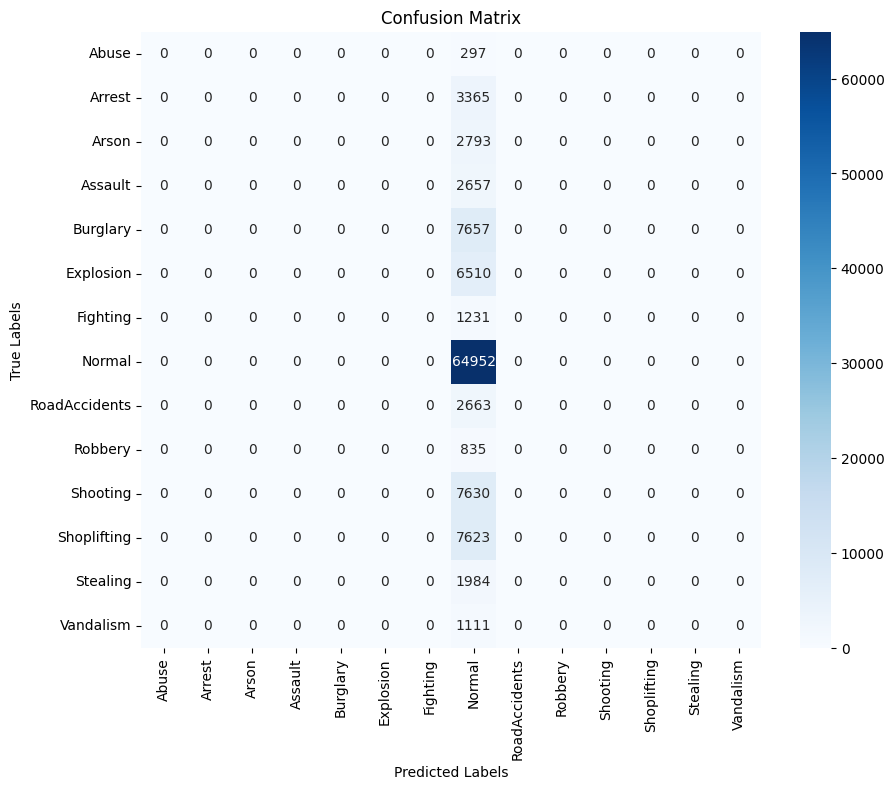

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_true = np.concatenate([y for x, y in test_dataset], axis=0)
if y_true.ndim > 1:  
    y_true = np.argmax(y_true, axis=1)


y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification Report
print(classification_report(y_true, y_pred, target_names=CLASS_LABELS))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [35]:

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical"  #one-hot encoded vectors
)


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)



Found 1266345 files belonging to 14 classes.
Found 111308 files belonging to 14 classes.


In [33]:
from sklearn.utils import class_weight
import numpy as np

# Extract labels from the training dataset
y_train_labels = np.concatenate([y for x, y in train_dataset], axis=0)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)


Class Weights: {0: 4.7417285744241084, 1: 3.426647508645463, 2: 3.7039111537494076, 3: 8.731005239933811, 4: 2.2897229213678183, 5: 4.823399684621889, 6: 3.6644471838322104, 7: 0.09543813917088811, 8: 3.8513673799588815, 9: 2.179963229598108, 10: 12.668517406962785, 11: 3.642166872788979, 12: 2.0189548298226483, 13: 6.638280807699566}


In [36]:

model.compile(optimizer=tf.keras.optimizers.SGD(LR), 
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.AUC()])


history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    class_weight=class_weights_dict  
)


19787/19787 ━━━━━━━━━━━━━━━━━━━━ 17383s 877ms/step - auc_2: 0.9148 - loss: 2.7332 - val_auc_2: 0.7769 - val_loss: 2.3713


In [37]:
keras.saving.save_model(model, 'capstone4.keras')

In [107]:
model=load_model('capstone4.keras')

def predict_emergency_in_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    emergency_detected = False
    consecutive_required = 3  # Frames required in a row to confirm emergency
    consecutive_count = 0  # Counter for consecutive emergency detections
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize and preprocess frame
        img = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        
        # Predict
        predictions = model.predict(img)
        pred_class_idx = np.argmax(predictions)
        pred_class = CLASS_LABELS[pred_class_idx]
        
        # Check only for "Explosion" or "RoadAccidents" classes, ignoring "Robbery"
        if pred_class in ["Explosion", "RoadAccidents"]:
            consecutive_count += 1  # Increment consecutive count
            if consecutive_count >= consecutive_required:
                print(f"{pred_class} detected consistently for {consecutive_required} frames at frame {frame_count}")
                emergency_detected = True
                break  # Exit on confirmed emergency
        elif pred_class not in ["Explosion", "RoadAccidents"]:
            # Reset consecutive count for irrelevant classes
            consecutive_count = 0

        frame_count += 1

    cap.release()
    
    if not emergency_detected:
        print("No accident or explosion detected in this video.")


In [111]:
video_path = r"C:\Users\vedan\Downloads\sample accident.mp4"
predict_emergency_in_video(video_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━

In [115]:
model=load_model('capstone4.keras')
IMG_WIDTH, IMG_HEIGHT = 64, 64  
EMERGENCY_CLASSES = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 
                     'Fighting', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 
                     'Stealing', 'Vandalism']

def predict_explosion_or_accident_in_video(video_path):
    # Open video file
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    emergency_detected = False
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Resize frame to model input size
        img = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        
        # Predict
        predictions = model.predict(img)
        pred_class_idx = np.argmax(predictions)
        pred_class = CLASS_LABELS[pred_class_idx]
        confidence = predictions[0][pred_class_idx]
        
        # Check if the detected class is an emergency (exclude "Normal")
        if pred_class != "Normal" and confidence > 0.2:  # Adjust confidence threshold as needed
            print(f"Emergency detected: {pred_class} with confidence {confidence:.2f} at frame {frame_count}")
            emergency_detected = True
        
        frame_count += 2
    
    cap.release()
    
    if not emergency_detected:
        print("No emergency detected in this video.")


In [116]:
video_path = r"C:\Users\vedan\Downloads\Surveillance Video Of Burglary At Queen's Jewelry.mp4"
predict_explosion_or_accident_in_video(video_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━